<a href="https://colab.research.google.com/github/lchutny/W207_ALSY_FinalProject/blob/master/W207_ALSY_FinalProject_Baseline_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project W207
## Andrew Webb, Laura Chutny, Suzy Choi, Yue Hu

# 1. From Kaggle
Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center  
right_eye_center  
left_eye_inner_corner  
left_eye_outer_corner  
right_eye_inner_corner  
right_eye_outer_corner  
left_eyebrow_inner_end  
left_eyebrow_outer_end  
right_eyebrow_inner_end  
right_eyebrow_outer_end  
nose_tip  
mouth_left_corner  
mouth_right_corner  
mouth_center_top_lip  
mouth_center_bottom_lip  

Left and right here refers to the point of view of the subject.  

In some examples, some of the target keypoint positions are missing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

## Why do we care?

Facial recognition has a variety of applications, notably in biometrics. Rather than sign into a phone or laptop, give a username and password for a service, or use some form of document identification, people can use their faces to identify themselves. As with fingerprints, no two faces are exactly alike, so this is actually a more robust form of identification than usernames, passwords, documents, etc. that can either be forged or stolen. In order to properly leverage facial recognition for identification, however, the key facial features must be identified with a high level of accuracy. Identifying key facial features given images of faces in a variety of contexts is a key aspect of leveraging facial recognition for personal identification. If we can accurately identify the facial keypoints of a given image in a variety of contexts, we can make sure that we can also accurately identify who the person associated with the face is (or that the image is even of a human face).

#### Data files - have been uploaded to GitHub Repo
- training.csv: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.  
- test.csv: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
- submissionFileFormat.csv: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict.

# 2. Plan
1. Data Cleaning
- TBD based on the tutorial

2. Identify ways to categorize images (i.e. this image the person is looking down, this one they are looking left, etc.) and add these features to the data

3. Split data - use training set and split into train, dev and test.

> 3a. Add training examples (pending feasibility)
*   by reversing the image
*   by generating images from the NB model

4. kNN; MN Naive Bayes; Logistic Regression --> run and compare as base

5. Maybe run

6. Then learn and run Neural Net to classify

**QUESTIONS / Comments - Laura (July 12/13)**

_Per Class Discussions - breakdown the problem:_

* In this problem set: Given $X$ - a 96x96 pixel image of a face (a 1 x 9216 vector of pixel values); predict $\hat Y$ - the x and y coordinates of 15 specific facial keypoints (list above), or alternately fill in the values for missing keypoints where some are given in a test case.

* Data given is the labeled (or semi-labeled) images ($X$). This is a supervised learning problem. The labels ($Y$) are continuous values (x,y coordinate pairs - in essence a 15 x 2 array of x,y values for 15 facial keypoints)

* Features are the values of the pixels in the image and their relationship to each other (format of the relationship TBD)  
  - Commentary on feature engineering - some more research here
  - Features (pixels) will be reduced to values between 0 and 1 (vs original 256 grayscale)
  - for all models the features will be in a 1 x 9216 except for Convolutional NN which needs them reshaped to a 96x96 matrix
  - May want to apply a blur to the images - as per our digit exercise - in order to assist in recognition
  - We have a Curse of Dimensionality - very high dimension feature space (9216) and a relatively small number of examples and only 15 features to train on (~2140 complete examples, up to 6000 if we include those only partially labeled). This data is extremely sparse which may mean that multiple hidden layers are better in the Neural net and likely means that other models will fare poorly.
  

* Model to use: we will try various models - from simiplistic kNN, NaiveBayes and Logistic Regression to compare and to learn about the data. We will move on to Neural Net with various numbers of hidden layers (2? 3? more?). Eventually we will need a convolutional neural net.
  - Sigmoid or softmax or other activation? How to decide?
  - What *is* a convolutional neural net (cNN): *'The role of the cNN is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction'*
  - Why would a cNN be the best model
  - Why use RMSE to evaluate model
  - What tolerance will the x,y coordinates have to meet to say that they are predicting correctly? (i.e. to what decimal place?)
  - Type of pooling to use in pooling layers of CNN - likely max pooling is better (reduces noise)
  - then likely add a fully connected layer after the convolational layers to introduce non-linearities
  
* Issues that may be encountered:  
  - Dealing with data that is missing - see point 2 below - and impact on the model
  - Images contain a large variation regarding centering and this may impact the behaviour of the model
  - As we are dealing with multiple labels, do we do it with an all-or-nothing approach (i.e. predict all 15 labels correctly, or zero), or can we do a 'sliding-scale' of prediction - i.e. the more facial keypoints detected correctly, the higher the score?

  
* Assumptions:  
  - All faces are human and have detectable keypoints
  -  ? More
  
* References:
  - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 - an excellent description of what a CNN is.
  
  

_Questions_

1.   What are we predicting on - the kaggle competition indicates we should be predicting the missing x or y coordinate of the specified feature. Where is this file?? (submissionFileFormat.csv)?
2. This is a 'multi-label' problem - each example (image) has 15 'labels'. Not all examples have all labels. In the approach above, we have eliminated about half the training data. Once we get to the end, we should go back and revisit this and see if we can improve training by changing this:
  *   Train again only on the labels that span the whole training set (4 labels)
  *   Train using images that have missing features and incorporate that into the model (i.e. maybe there are patterns with the images that have missing features?)
  *   Reduce the label data using clustering (create new labels) and train again  - not sure how to un-transform the prediction tho
3. For the NN - using sigmoid activation may help us in the predictions
4. Do we need to shuffle the training data
5. In data processing ahead of training - lots to do here:
- Deal with images that aren't centered (will need examples. once we have those we can play around with transformation)




# 3. Baseline & Schedule
Due Week 10: (July 8)
- Plan for project
- Do Tutorial
- EDA / Cleaning
- More detailed plan around project (maybe a pseudocode type plan)
- check out Google colab - using this
- Theano - install - no need when using colab

Week 11/12 (July 15 and 22)
July 15 - Office Hours - Andrew - ask questions about package recommendations and discuss document.
July 21 - Tentative meeting: 6 PM Pacific, 7 PM Mountain, 8 PM Central, 9 PM Eastern

Week 12 - Checkin with Instructor  (July 22)

Week 14 - Project due (August 5)

--------

Week of July 15 - 21
  - Finish Kaggle Tutorial & Week 7
  - Finish Section 5 - more EDA - Laura
  - Finish Section 6 - kNN - Suzy
  - Finish Section 7 - Multinomial NB - Yue
  - Finish Section 8 - Logistic Regression - Andrew 


Week of July 22 - 28  
  - Running NN #1  - Single and 2 layer
  - Running NN #2 - First pass at a convolution layer
  - Running NN #3 - Second pass/revision at multiple convolution layers
  - Running NN #4 - Final pass - most improved cNN


Week of July 29 - August 4  
  - xx
  - Finish write up 





# 4. Setup

In [1]:
# ADD OTHER IMPORTS HERE AS NECESSARY
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import csv
import os

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Theano imports
import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
print(theano.config.device) # We're using CPUs (for now)
print(theano.config.floatX) # Should be 64 bit for CPUs
np.random.seed(0) # Setting random seed


cpu
float64


In [2]:
print("python version =",sys.version)
print("Pandas Version = ",pd.__version__)
print("Numpy Version = ",np.__version__)

python version = 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas Version =  0.24.2
Numpy Version =  1.16.4


In [9]:
# Run this cell to mount your Google Drive - if that is where you want to access your data from
from google.colab import drive
drive.mount('/content/drive')
# Make sure to upload from your local machine and then this path will work

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 5. Data Import and Cleaning
 - There is a Train and Test sample in the data from Kaggle
 - We should split the Train data into Train and Dev - and optimize on Dev; Save Test for the very last step in each method.
 - Select an appropriate scoring method (per the Kaggle contest and maybe one other as well)

### Approaches to data load, cleaning, and transformation



There are images in the data that are either

  *   *Missing* feature labels (i.e. The face is centered but things like left_eyebrow_inner_end are not labeled)
  *   Having the person in the image face down, left, right, up, etc. and the feature labels are *not available* (i.e. if a person is facing left, some of their left features will not be available)



As the former point (missing labels) seems more prevelent, we can start there. One option will be to load data that only has complete labels. This can be added to the load data function with a parameter to set the option if we want to load all the data or just "complete" data. We can then train a model on the complete data and perhaps use it to "fill-in" other aspects of the training data which have missing labels


Then we will need to address the second point (labels not available). It will be necessary to find examples of people facing various directions and see if we can use any logic to add a dummy variable for each scenario (facing left, right, down, up, etc.)


In [0]:
# Utilize a function to load and tidy up the data

# Update with filepath. Just uncomment the code to get your filepath to work
# Andrew's filepath
#filepath = '/content/drive/My Drive/FinalProject_w207/'
# Suzy's filepath
#filepath = '/content/drive/My Drive/FinalProject_w207/'
# Yue's filepath
#filepath = ''
# Laura's filepath
filepath = '/content/'


def load_data(data_type='train', columns=None, filepath=filepath, data='complete'):
  """Load the data from Kaggle.
  A filepath string variable gives the path to the csv data
  
  If data_type = 'train', then load the train data
  If data_type = 'dev', then load the dev data
  If data_type = 'test', then load the test data.
  
  If data = 'complete', then only images with complete labels are returned
  If data = 'incomplete', then only images ANY with NaN label values are returned
  If any other value, then all images are returned
  
  You can also pass in a list of columns if you only want a subset
  """
  
  # create a DataFrame object with the training.csv data
  # shuffle records in the csv file
  df = shuffle(pd.DataFrame(pd.read_csv(filepath + 'training.csv')),
              random_state = 42) # set a seed for development
  
  # Use the first 6000 records for training
  train_data = df[:6000]
  
  # And the rest for dev
  dev_data = df[6000:]
  
  # Test data
  test_data = pd.DataFrame(pd.read_csv(filepath + 'test.csv'))
  
  if data_type == 'train':
    df = train_data
    
  elif data_type == 'dev':
    df = dev_data
    
  elif data_type == 'test':
    df = test_data
    
  else:
    print('Something went wrong with the train/dev/test data assignment')
    
  # train and dev data will have labels (facial keypoints) as well as an associated image
  # test data only has the image column
  # the image column is a string field delimited by spaces
  # we will split the image column and turn it into a numpy array
  
  # Assign the X variable to the image
  df['Image'] = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
  
  # if the columns were passed in to the function
  if columns:  
    df = df[list(columns) + ['Image']]
  
  # prints the number of values for each column
  print("Number of Values Each Column =\n",df.count())  

  # drop all rows that have missing values in them if data == 'complete'
  # this will ONLY output images that have no unavailable labels 
  # (i.e. no images with faces turned left/right/up/down and no missing values)
  if data == 'complete':
    df = df.dropna() 
    print("Number of rows total after dropping missing valued data =",df.shape[0])
    
  # include only images that have missing or unavailable labels
  # this can be used to help "fill-in" missing values to increase the training set
  elif data == 'incomplete':
    df = df[df.isnull().any(1)]
    print("Number of rows total after dropping completely labeled data =",df.shape[0])
    
  # include all rows of the data
  else:
    print("Number of rows having no data dropped =", df.shape[0])
  
  # scale pixel values to [0, 1]
  X = np.vstack(df['Image'].values) / 255.  
  X = X.astype(np.float32)
  
  # Assign y variable to labels, if applicable (i.e. if we are not using test data)
  if data_type == 'test':
    y = None
  else:
    # set y to equal all but the last column (only the labels, not the image)
    y = df[df.columns[:-1]].values
    # scale target coordinates to [-1, 1] - i.e. center of the image is x=y=0
    y = (y - 48) / 48
    # shuffle train data
    #X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
  return X, y
  
      

In [15]:
# get train data into X and y and print number of values in each column
train_X, train_y = load_data(data_type = 'train', data='complete')
print("X shape:",train_X.shape,"y shape",train_y.shape)

Number of Values Each Column =
 left_eye_center_x            5991
left_eye_center_y            5991
right_eye_center_x           5988
right_eye_center_y           5988
left_eye_inner_corner_x      1954
left_eye_inner_corner_y      1954
left_eye_outer_corner_x      1950
left_eye_outer_corner_y      1950
right_eye_inner_corner_x     1952
right_eye_inner_corner_y     1952
right_eye_outer_corner_x     1950
right_eye_outer_corner_y     1950
left_eyebrow_inner_end_x     1954
left_eyebrow_inner_end_y     1954
left_eyebrow_outer_end_x     1916
left_eyebrow_outer_end_y     1916
right_eyebrow_inner_end_x    1955
right_eyebrow_inner_end_y    1955
right_eyebrow_outer_end_x    1925
right_eyebrow_outer_end_y    1925
nose_tip_x                   6000
nose_tip_y                   6000
mouth_left_corner_x          1951
mouth_left_corner_y          1951
mouth_right_corner_x         1952
mouth_right_corner_y         1952
mouth_center_top_lip_x       1958
mouth_center_top_lip_y       1958
mouth_center_bot

In [16]:
# get dev data into X and y splits and print the same values
dev_X, dev_y = load_data(data_type = 'dev', data='complete')

Number of Values Each Column =
 left_eye_center_x            1048
left_eye_center_y            1048
right_eye_center_x           1048
right_eye_center_y           1048
left_eye_inner_corner_x       317
left_eye_inner_corner_y       317
left_eye_outer_corner_x       317
left_eye_outer_corner_y       317
right_eye_inner_corner_x      316
right_eye_inner_corner_y      316
right_eye_outer_corner_x      318
right_eye_outer_corner_y      318
left_eyebrow_inner_end_x      316
left_eyebrow_inner_end_y      316
left_eyebrow_outer_end_x      309
left_eyebrow_outer_end_y      309
right_eyebrow_inner_end_x     315
right_eyebrow_inner_end_y     315
right_eyebrow_outer_end_x     311
right_eyebrow_outer_end_y     311
nose_tip_x                   1049
nose_tip_y                   1049
mouth_left_corner_x           318
mouth_left_corner_y           318
mouth_right_corner_x          318
mouth_right_corner_y          318
mouth_center_top_lip_x        317
mouth_center_top_lip_y        317
mouth_center_bot

In [17]:
# Print a sample of the train data
print(train_X[0:1,:], train_X[0:1,:].shape)

[[0.04705882 0.04705882 0.04313726 ... 0.27058825 0.25490198 0.23529412]] (1, 9216)


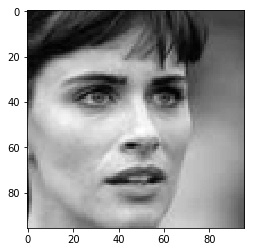

In [18]:
# Print a sample X image from the above data (0 is black, 1 is white)
#img = train_X[0].reshape(96,96)[:,::-1]
img = train_X[0].reshape(96,96)
plt.imshow(img, cmap='gray') 

In [19]:
# Print a sample of y label data. x,y = 0,0 is the center of the image.
keypoints_1 = train_y[0:1,:]
print(keypoints_1,keypoints_1.shape, type(keypoints_1))

[[ 0.261807   -0.20208012 -0.34046057 -0.20353137  0.13390376 -0.17920847
   0.39397693 -0.18342675 -0.22617969 -0.16135813 -0.5313947  -0.15987785
   0.11421517 -0.31416225  0.4764021  -0.3693298  -0.10285714 -0.34354496
  -0.6637912  -0.31978694  0.1138322   0.21350466  0.2699293   0.55108494
  -0.2746109   0.5821255   0.04251724  0.51590264  0.02736945  0.60252357]] (1, 30) <class 'numpy.ndarray'>


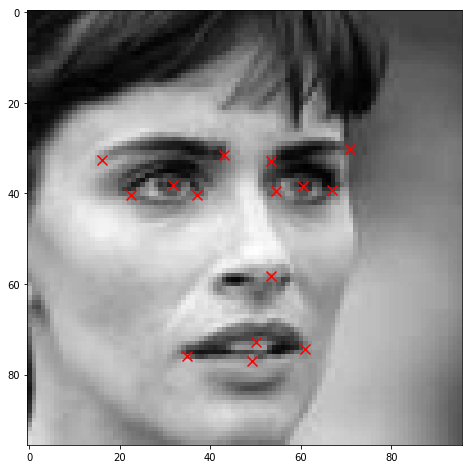

In [20]:
# print the sample image with the training 'labels' - keypoint indices marked on image.
# process y data into 2 columns - first is x and second is y for plotting points
keypoints_2 = keypoints_1.reshape(15,2)

# we normalized the keypoint locations, but to plot we need to 'un-normalize'
keypoints_3 = keypoints_2*48 + 48

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)
plt.show()

# Flipping images and labels for extra training data

In [0]:
# create a function to flip images and labels

def flip_image(img_array, img_labels):
  flipped_images = np.empty(img_array.shape)
  for i in range(len(img_array)):
    # reshape the array to 96x96 shape, flip the row values, 
    # then reshape back to the original 1x9216 shape
    arr = img_array[i].reshape(96,96)[:,::-1].reshape(1, 9216)
    # add the flipped array to flipped images
    flipped_images[i] = arr
  
  flipped_labels = np.empty(img_labels.shape)
  for i in range(len(img_labels)):
    # reshape the label array to a 15x2 array
    # 0th column will be the x-coordinates of the labels
    # multiply the x-coordinates by -1 to flip them horizontally
    label = img_labels[i].reshape(15,2)
    label[:,0] *= -1
    label = label.reshape(15,2)
    # reshape back to the original shape
    label = label.reshape(1, 30)
    # add the flipped label to flipped labels array
    flipped_labels[i] = label
  
  return flipped_images, flipped_labels
    

In [0]:
train_X_flipped, train_y_flipped = flip_image(train_X, train_y)

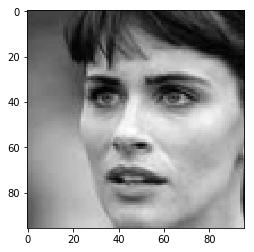

In [23]:
img_flipped = train_X_flipped[0].reshape(96,96)
plt.imshow(img_flipped, cmap='gray') 

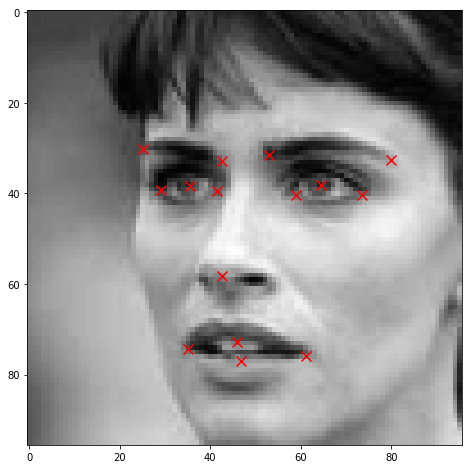

In [24]:
keypoints_1 = train_y_flipped[0:1,:]
keypoints_2 = keypoints_1.reshape(15,2)
keypoints_3 = keypoints_2*48 + 48

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img_flipped,cmap='gray')
plt.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)
plt.show()

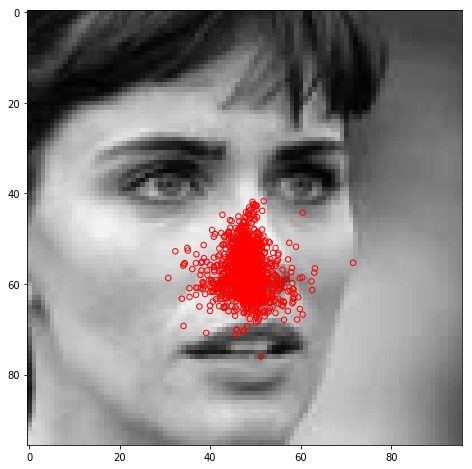

In [25]:
# Look at variability in training data using nose tip - element 10 (x is feature 20 and y is feature 21 in the train_y matrix- indexed from 0)
# define nose data:
nose = train_y[:,20:22]*48+48
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(nose[:,0],nose[:,1],edgecolors='r',marker="o",facecolors='none', s=30)
plt.show()

DO Some Stats on the labels - and look at relative functions of labels with each other - which are correlated, can can we use this to our advantage for the data where labels are missing?

- One approach is to ignore the error in a CNN on the final output layer per this paper: [https://shangyuezhu.github.io/shangyuezhu.github.io/images/Convolutional_Neural_Network.pdf]

- 

- 

In [35]:
# Code Laura Misc - this from https://medium.com/diving-in-deep/facial-keypoints-detection-with-pytorch-86bac79141e4
missing_any_data = np.isnan[moar_data]
idxs = np.random.choice(missing_any_data.index, 4)
show_images(moar_data, idxs)


TypeError: ignored

# 6. kNN Classification & Scoring

Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#each label output is a regression value as opposed to a classifier
#find optimal k
#Use GridSearchCV
param = {'n_neighbors': [2,3,4,5,6,7,8,9]}
knn_regressor = KNeighborsRegressor()
knn_search = GridSearchCV(knn_regressor, param, cv=5)
knn_search.fit(train_X, train_y)
best_k = knn_search.best_params_  
optimal_k = knn_search.best_params_['n_neighbors']
print("optimal k: ", optimal_k)

#optimal k:5
#predict on the dev set
knn=KNeighborsRegressor(n_neighbors = optimal_k)
knn.fit(train_X, train_y)
dev_predict_label= knn.predict(dev_X)

print("RMSE of dev data: %.2f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

optimal k:  5
RMSE of dev data: 0.54


In [28]:
#how each individual label performed
label_names = list(pd.DataFrame(pd.read_csv(filepath + 'training.csv')).columns)[:-1]
pd.DataFrame(np.sqrt(mean_squared_error(dev_y, dev_predict_label, multioutput='raw_values')), columns=['RMSE'], index=label_names).sort_values('RMSE', ascending=False)

,RMSE
right_eyebrow_outer_end_x,1.351444
left_eyebrow_outer_end_x,1.321117
right_eye_outer_corner_x,1.074508
left_eye_outer_corner_x,1.062076
right_eye_center_x,0.768908
left_eye_center_x,0.761929
mouth_left_corner_x,0.647503
mouth_right_corner_x,0.637182
right_eye_inner_corner_x,0.481104
left_eye_inner_corner_x,0.473799


*Comment on kNN*
For RMSE, the closer the value is to '0' the better the prediction, so there are some very good values in the above predictions and some very bad ones.

# 7. Multinomial Naive Bayes Classification & Scoring
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

# 8. Logistic Regression Classification & Scoring
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

### Try number 1, using standard LinearRegression model

In [0]:
train_y[:30].shape

example = np.take(train_y[:5], 0, axis=1)

In [30]:
train_y[3][0]

#example
#array([0.261807  , 0.373303  , 0.38609815, 0.3375    , 0.32623616],
      #dtype=float32)

-0.3375

In [0]:
# Instantiate a LR model with the LogisticRegression class

# Set the multi_class parameter to 'multinomial' as our outputs are not
# binomial, hence one-vs-rest will not work as well

# In order to use multinomial option, we need a non "liblinear" solver
# Available solvers for multinomial: ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

lr_mod = LinearRegression()
#lr_mod = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial')

# Need to figure out how to predict multiple outputs..but for now do 1 at a time
label_names = list(pd.DataFrame(pd.read_csv(filepath + 'training.csv')).columns)[:-1]

for i in range(len(label_names)):
  label_name = label_names[i]
  # create a Nx1 array of y values for the individual label
  indiv_train_labels = np.take(train_y, i, axis = 1)
  # fit the logistic regression model using the individual label
  lr_mod.fit(train_X, indiv_train_labels)
  # predict the coordinates of the individual label
  indiv_dev_labels = np.take(dev_y, i, axis = 1)
  
  # show the label name and accuracy
  print(label_name, 'Coefficient of determination:', lr_mod.score(dev_X, indiv_dev_labels))

left_eye_center_x Coefficient of determination: 0.08684656114418499
left_eye_center_y Coefficient of determination: 0.3134201798107442
right_eye_center_x Coefficient of determination: 0.10876021061206763
right_eye_center_y Coefficient of determination: 0.3408267672018279
left_eye_inner_corner_x Coefficient of determination: 0.05908503529576048
left_eye_inner_corner_y Coefficient of determination: 0.20128194541920919
left_eye_outer_corner_x Coefficient of determination: 0.23893685428884226
left_eye_outer_corner_y Coefficient of determination: 0.3339572958909766
right_eye_inner_corner_x Coefficient of determination: -0.10247376074158532
right_eye_inner_corner_y Coefficient of determination: 0.18117251289611647
right_eye_outer_corner_x Coefficient of determination: 0.09620668128896726
right_eye_outer_corner_y Coefficient of determination: 0.3927109164405618
left_eyebrow_inner_end_x Coefficient of determination: 0.007396857113590172
left_eyebrow_inner_end_y Coefficient of determination: -0

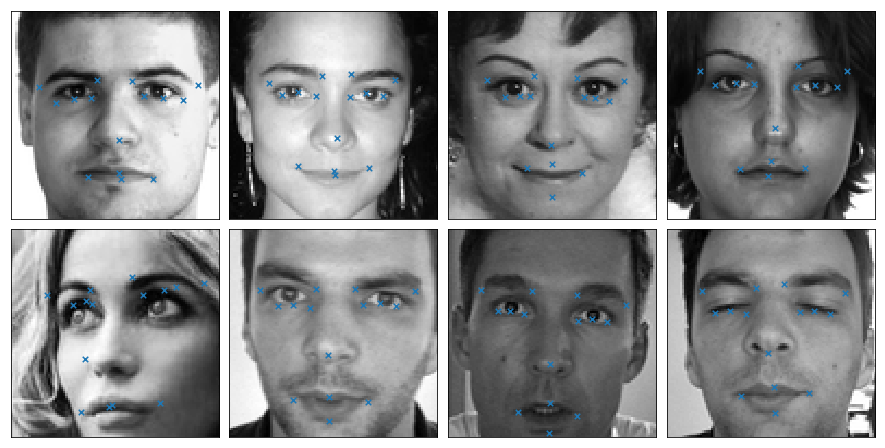

In [0]:
# Those R-squared values aren't ideal, but let's see how it's doing

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=30)

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

lr_mod = LinearRegression()
lr_mod.fit(train_X, train_y)
p = lr_mod.predict(dev_X)

for i in range(8):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(dev_X[i], p[i], ax)

plt.show()

In [31]:
moar_data = np.append(train_X, train_X_flipped, axis=0)
moar_data.shape

moar_labels = np.append(train_y, train_y_flipped, axis=0)
moar_labels.shape

(3684, 30)

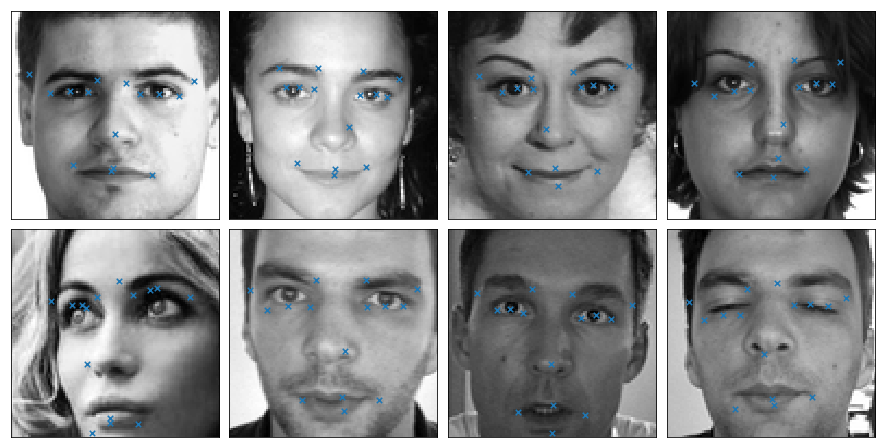

In [0]:
# with MOAR DATA

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=30)

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

lr_mod = LinearRegression()
lr_mod.fit(moar_data, moar_labels)
p = lr_mod.predict(dev_X)

for i in range(8):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(dev_X[i], p[i], ax)

plt.show()

### Try number 2, using theano as done in the tutorial

In [0]:
# To start, we can add some small weights for the number of features and lables
# First get the number of features from our X data
num_features = train_X.shape[1]
# Then get the number of labels from the Y data
num_labels = train_y.shape[1]

print('Number of features:', num_features)
print('Number of labels:', num_labels)

# Now we can create an array with very small weights
# This will be our initial weights parameter
weights = theano.shared(
    np.asarray(
        (np.random.randn(*(num_features, num_labels))*.01)
    )
)

X = T.matrix()
Y = T.matrix()

# Next, we can create a Linear Regression model using theano
# This will be similar to a NN but with no hidden layers
# Output will just be the dot product of the X array and the weights

def dot_product_LR(X, w):
  '''
  Uses theano\'s built in softmax functionality to return predicted values of
  labels given an X array of input features and a level of weights for those
  features. Output is the dot product of features and weights
  '''
  return T.nnet.softmax(T.dot(X, w))


# Output weights to be used for Y predictions
y_pred_weights = dot_product_LR(X, weights)

# Use Theano's built in cross entropy functionality to build a cost function
cost_func = T.mean(T.nnet.categorical_crossentropy(y_pred_weights, Y))

# With that cost function, set objective to find the argmax
# Selected alpha parameter
alpha = 0.01
# Take the derivative of that cost function
gradient = T.grad(cost=cost_func, wrt=weights) 
# Using the gradient and alpha, update will change to a new weights value
update = [[w, w - gradient * alpha]] 

# create a theano train function which will take feature and label data, compute the cost,
# and run the update based on what has been set out in the above code
train = theano.function(inputs=[X, Y], outputs=cost_func, updates=update, allow_input_downcast=True) 
# select largest probability from y_pred_weights as the prediction
y_pred = T.argmax(y_pred_weights, axis=1) 
# create a theano predict function to use X as an input, output the y_pred values
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# To test our prediction accuracy, we will use the dev complete data

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_X[0:len(train_X)], train_y[0:len(train_X)])
        trainTime =  trainTime + (time.time() - start_time)
        print('accuracy = ', (i+1, np.mean(np.argmax(dev_y, axis=1) == predict(dev_X))))
    print('train time = ', trainTime)

gradientDescent(50)

start_time = time.time()
predict(dev_X)   
print('predict time = ', (time.time() - start_time))

Number of features: 9216
Number of labels: 30


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


accuracy =  (1, 0.03691275167785235)
accuracy =  (2, 0.03691275167785235)
accuracy =  (3, 0.03691275167785235)
accuracy =  (4, 0.03691275167785235)
accuracy =  (5, 0.03691275167785235)
accuracy =  (6, 0.03691275167785235)
accuracy =  (7, 0.03691275167785235)
accuracy =  (8, 0.03691275167785235)
accuracy =  (9, 0.03691275167785235)
accuracy =  (10, 0.03691275167785235)
accuracy =  (11, 0.03691275167785235)
accuracy =  (12, 0.03691275167785235)
accuracy =  (13, 0.03691275167785235)
accuracy =  (14, 0.03691275167785235)
accuracy =  (15, 0.03691275167785235)
accuracy =  (16, 0.03691275167785235)
accuracy =  (17, 0.03691275167785235)
accuracy =  (18, 0.03691275167785235)
accuracy =  (19, 0.03691275167785235)
accuracy =  (20, 0.03691275167785235)
accuracy =  (21, 0.03691275167785235)
accuracy =  (22, 0.03691275167785235)
accuracy =  (23, 0.03691275167785235)
accuracy =  (24, 0.03691275167785235)
accuracy =  (25, 0.03691275167785235)
accuracy =  (26, 0.03691275167785235)
accuracy =  (27, 0.03

# 9. Neural Net Classification & Scoring  

Note - this example is from Week7 which requireds binarizing the labels before processing - not sure this is what we want.  
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

DO: Single Layer
Do: Two Layer
Score Each

In [38]:
## (1) Parameters 
# Initialize the weights to small, but non-zero, value
numFeatures = train_X[1].size
print(numFeatures)
numClasses = train_y[1].size
print(numClasses)
z = (np.random.randn(*(numFeatures, numClasses))*0.01)
print(z.shape, type(z))
z2 = np.asarray(z)
print(z2.shape, type(z2))
w = theano.shared((np.random.randn(*(numFeatures, numClasses))*.01))
print(w.ndim,type(w),type(w.get_value()))
print(w.dtype)
print(w.nonzero(), w.shape)

9216
30
(9216, 30) <class 'numpy.ndarray'>
(9216, 30) <class 'numpy.ndarray'>
2 <class 'theano.tensor.sharedvar.TensorSharedVariable'> <class 'numpy.ndarray'>
float64
(Subtensor{int64}.0, Subtensor{int64}.0) Shape.0


In [0]:
## (2) Model
# Theano objects accessed with standard Python variables
# using Softmax - i.e. basically just a multi-class version of sigmoid activation
X = T.matrix()
Y = T.matrix()

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))
y_hat = model(X, w)
print(y_hat,y_hat.dtype, y_hat.ndim, type(y_hat))

In [0]:
## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))
print(cost, cost.dtype, cost.ndim, type(cost))

In [0]:
## (4) Objective (and solver)

alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_data[0:len(train_data)], train_labels_b[0:len(train_data)])
        trainTime =  trainTime + (time.time() - start_time)
        print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(test_labels_b, axis=1) == predict(test_data))))
    print('train time = %.2f' %(trainTime))

gradientDescent(50)

start_time = time.time()
predict(test_data)   
print('predict time = %.2f' %(time.time() - start_time))

Next Steps - do some/all/none of the following:
- Try Stochastic and Mini-Batch 
- Try 2 and 3 layer models
- Try using a different activation - like rectifier and/or max pooling
- Try adding noise (like Dropouts) - can increase generalization and training speeds

# 10. Convolutional Neural Net (CNN or ConvoNet)

**FINALLY**: *Convolutional NN*

- This is likely the prize - developed for image processing
- Need to reprocess data - uses 2D images (not 1D)
- Go to last section of Week7 Tutorial for code on Convolutional NNs
- Possibly do a generative model to create images and further train the network (e.g. by mirroring the faces - so making 2 faces out of one)

# 10. Conclusions  

Make sure to write up summary of different methods, results based on Dev and then on Test (maybe present in table). 